# **1. Download the Dataset**

 The dataset is successfully downloaded.

# **2. Image Augmentation**

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib.pyplot import imread,imshow,subplots,show
import numpy as np
import os
from PIL import Image
from skimage import io

In [2]:
train_data=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True)

In [3]:
test_data=ImageDataGenerator(rescale=1./255)

In [4]:
xtrain=train_data.flow_from_directory('flowers/',
                                      target_size=(64,64),
                                      class_mode='categorical',
                                      batch_size=100)

Found 4317 images belonging to 5 classes.


In [5]:
xtest=test_data.flow_from_directory('flowers/',
                                         target_size=(64,64),
                                         class_mode='categorical',
                                         batch_size=100)

Found 4317 images belonging to 5 classes.


# **3. Creating CNN Model**

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

# **4. Add Layers (Convolution,MaxPooling,Flatten,Dense-(HiddenLayers),Output)**

In [7]:
model=Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(5,activation='softmax'))

# **5. Compile the Model**

In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


# **6. Fit the Model**

In [11]:
model.fit(xtrain,steps_per_epoch=len(xtrain),
          epochs=15,validation_data=xtest,validation_steps=len(xtest))

Epoch 1/15
44/44 [==============================] - 23s 526ms/step - loss: 0.2219 - accuracy: 0.9268 - val_loss: 0.1695 - val_accuracy: 0.9400
Epoch 2/15
44/44 [==============================] - 23s 524ms/step - loss: 0.2288 - accuracy: 0.9224 - val_loss: 0.1457 - val_accuracy: 0.9523
Epoch 3/15
44/44 [==============================] - 23s 524ms/step - loss: 0.2084 - accuracy: 0.9287 - val_loss: 0.1748 - val_accuracy: 0.9393
Epoch 4/15
44/44 [==============================] - 23s 528ms/step - loss: 0.1890 - accuracy: 0.9333 - val_loss: 0.1444 - val_accuracy: 0.9493
Epoch 5/15
44/44 [==============================] - 23s 537ms/step - loss: 0.1985 - accuracy: 0.9307 - val_loss: 0.4471 - val_accuracy: 0.8548
Epoch 6/15
44/44 [==============================] - 23s 527ms/step - loss: 0.2274 - accuracy: 0.9226 - val_loss: 0.1483 - val_accuracy: 0.9500
Epoch 7/15
44/44 [==============================] - 23s 528ms/step - loss: 0.1865 - accuracy: 0.9384 - val_loss: 0.1305 - val_accuracy: 0.9534

# **7. Save the Model**

In [12]:
model.save('flowers.h5')

# **8. Test the Model**

In [13]:
from tensorflow.keras.preprocessing import image
import numpy as np

### Testing : Rose Image

In [36]:
fl_img='imagetest1.jpg' 
img=image.load_img(fl_img,target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x))
op=['daisy','dandelion','rose','sunflower','tulip']
op[pred]

1/1 [==============================] - 0s 21ms/step


'rose'

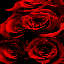

In [37]:
img

### Testing : Daisy Image

In [39]:
fl_img='imagetest3.jpg'
img=image.load_img(fl_img,target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x))
op=['daisy','dandelion','rose','sunflower','tulip']
op[pred]

1/1 [==============================] - 0s 21ms/step


'daisy'

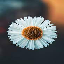

In [40]:
img

### Testing : Dandelion Image

In [43]:
fl_img='imagetest4.jpg'
img=image.load_img(fl_img,target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x))
op=['daisy','dandelion','rose','sunflower','tulip']
op[pred]

1/1 [==============================] - 0s 19ms/step


'dandelion'

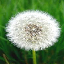

In [44]:
img

### Testing : Sunflower Image

In [45]:
fl_img='imagetest5.jpg'
img=image.load_img(fl_img,target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x))
op=['daisy','dandelion','rose','sunflower','tulip']
op[pred]

1/1 [==============================] - 0s 20ms/step


'sunflower'

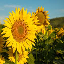

In [47]:
img

### Testing : Tulip Image

In [42]:
fl_img='imagetest6.jpg'
img=image.load_img(fl_img,target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x))
op=['daisy','dandelion','rose','sunflower','tulip']
op[pred]

1/1 [==============================] - 0s 20ms/step


'tulip'

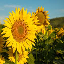

In [48]:
img